In [11]:
years = list(range(2018,2023))
years

[2018, 2019, 2020, 2021, 2022]

In [49]:
from sklearn.linear_model import LinearRegression
import pandas as pd

mlr = LinearRegression()

mlr_list = []

for year in years:
    data = pd.read_csv('./StockMarketEDA_LR_new_US_YOY_'+ str(year) +'.csv', encoding='utf-8')
    data = data.set_index('Unnamed: 0')

    x = data.iloc[:, :-1]
    y = data['price_YOY']

    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle=True, random_state=1000) 
    mlr.fit(x_train, y_train)
    y_predict = mlr.predict(x_test)
    mlr_list.append(mlr.coef_.tolist())

mlr_df = pd.DataFrame(mlr_list, index=years, columns = data.iloc[:,:-1].columns)

mlr_df = mlr_df.T
mlr_df



,2018,2019,2020,2021,2022
ROE_LR,0.017207,0.326175,0.398186,0.320550,0.139324
ROA_LR,-0.107246,0.049405,-0.161964,-0.411553,-0.329244
PER_LR,0.119117,0.201316,-0.104516,-0.233271,-0.306836
PBR_LR,-0.039909,-0.251384,-0.302416,0.060115,-0.204577
equity_LR,-0.004990,0.032052,-0.052005,0.360505,0.057266
FCF_asset_LR,0.209418,0.241728,0.117035,-0.279484,-0.423082
ROE_new,-0.042997,-0.098160,-0.025002,0.041169,-0.002543
ROA_new,0.030693,0.057269,0.010001,0.031348,0.055874
PER_new,-0.008053,-0.008327,0.021607,0.080107,0.061257
PBR_new,0.060170,0.149092,0.017631,-0.093590,0.090062


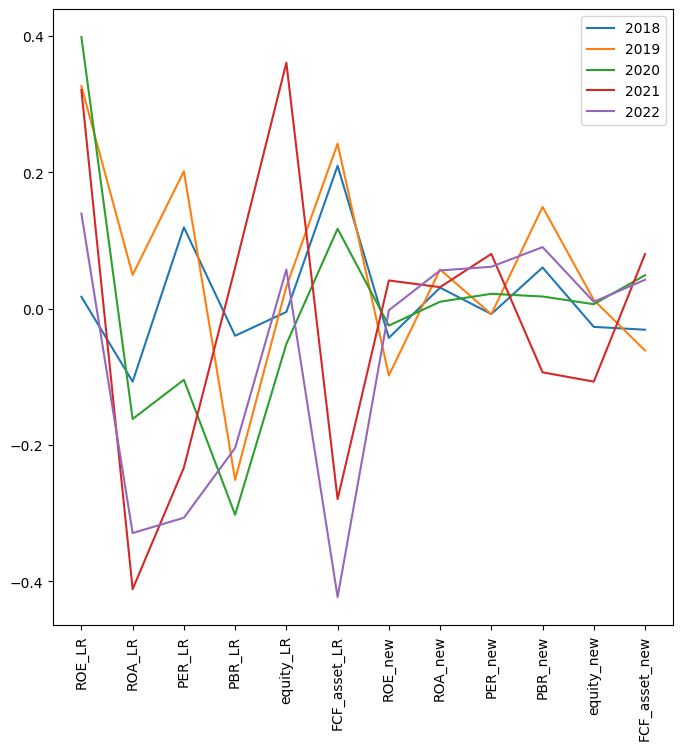

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.plot(mlr_df.index, mlr_df[2018], label='2018')
plt.plot(mlr_df.index, mlr_df[2019], label='2019')
plt.plot(mlr_df.index, mlr_df[2020], label='2020')
plt.plot(mlr_df.index, mlr_df[2021], label='2021')
plt.plot(mlr_df.index, mlr_df[2022], label='2022')
plt.legend(years)
plt.xticks(rotation=90)
plt.show()

In [1]:
import pandas as pd

data_2022 = pd.read_csv('./StockMarketEDA_LR_new_US_YOY_2022.csv', encoding='utf-8')
data_2022 = data_2022.set_index('Unnamed: 0')

In [2]:
from sklearn.model_selection import train_test_split

x = data_2022.iloc[:,:-1] #'price_YOY' 열을 제외한 데이터
y = data_2022['price_YOY']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle=True, random_state=1) 

In [3]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [4]:
y_predict = mlr.predict(x_test)

In [8]:
mlr_2022 = mlr.coef_.tolist()
mlr_2022


[0.2079854884351467,
 -0.22802992305066294,
 -0.42668234863985416,
 -0.180305377889937,
 0.09561380285863863,
 -0.47359728347959656,
 -0.008234380649331907,
 0.02365508581963814,
 0.04309155378250211,
 0.10118620069578796,
 0.004338724073370166,
 0.027585374233073084]

In [11]:
result_list = []

for j in data_2022.index:
    tmp_result = []
    for i in range(len(mlr_2022)):
        tmp_result.append(data_2022.loc[j][:-1].iloc[i] * mlr_2022[i]) #각 지표와 상관 계수의 곱을 원소로하는 리스트

    result_list.append(sum(tmp_result)) # 곱의 합을 회사별로 지정하기위한 리스트

In [12]:
result_list

[0.09224250682751993,
 -0.024355908050865842,
 -0.09761969620688361,
 -0.04357514195256495,
 -0.049831144773728075,
 0.13996256525645673,
 -0.12638052468912303,
 -0.028531017647106728,
 -0.21142182923836905,
 0.01853720840645145,
 -0.005912875600061707,
 -0.10349107153725053,
 -0.0055386459225996824,
 -0.23233685165357676,
 -0.06359926258673097,
 -0.058178056679164,
 0.057346606373066426,
 -0.004465594891760611,
 0.11923002870651978,
 -0.038960541627110955,
 -0.09992428033287692,
 0.3167611282201563,
 -0.07547978323779342,
 0.0031863655921052403,
 -0.20970752698896675,
 -0.15392357905149745,
 -0.01773850931201744,
 0.2084717715688644,
 -0.00018322605846118542,
 0.10122216610132759,
 -0.16628765785384736,
 -0.06787762113623688,
 0.065290705918273,
 -0.20435013683204362,
 0.06340891117755301,
 0.12461553882932158,
 -0.025692031654030237,
 -0.1015976356549228,
 -0.1912190808422547,
 -0.05212587971165446,
 -0.03585698797289872,
 -0.025043047384610113,
 0.0077821925946460965,
 -0.3421434439

In [13]:
data_2022['predict'] = result_list
data_2022

,ROE_LR,ROA_LR,PER_LR,PBR_LR,equity_LR,FCF_asset_LR,ROE_new,ROA_new,PER_new,PBR_new,equity_new,FCF_asset_new,price_YOY,predict
Unnamed: 0,,,,,,,,,,,,,,
Apple,0.289228,0.174557,0.264992,0.307775,-0.342372,0.219560,2.640741,2.192813,0.714483,2.465112,-1.194042,2.610142,-0.286138,0.092243
Microsoft,0.260341,0.162492,0.196940,0.328145,-0.075197,0.155937,1.499393,1.478211,-0.003853,1.020585,0.879722,1.930273,-0.283585,-0.024356
Amazon,0.183869,0.204169,-0.215631,-0.218552,0.046507,-0.122348,-1.101609,-0.771049,-0.003873,-2.382057,0.868058,-1.323435,-0.507055,-0.097620
Tesla,-0.123090,0.091254,0.134700,-0.079267,0.247651,-0.098609,0.559845,2.455782,0.093185,-1.040438,2.493750,0.456673,-0.691994,-0.043575
NVIDIA,0.257943,0.249732,0.298874,0.306750,-0.149609,0.233961,1.181425,0.899451,1.561518,1.721828,-0.603613,0.397501,-0.514824,-0.049831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Steel Dynamics,0.274597,0.279802,-0.206896,0.019584,0.303168,0.171164,2.011239,2.191774,-0.839184,0.367588,2.133904,2.377217,0.584496,0.137134
Southwest Airlines,-0.061797,-0.085462,-0.013296,-0.150018,-0.199567,-0.078435,-1.864681,-2.044380,1.308756,-1.339576,-0.939217,-1.490570,-0.234773,-0.099926
Hologic,0.113139,0.200957,-0.159339,0.119044,0.323998,0.257692,0.343327,0.995185,-0.005107,-1.027074,2.139397,1.751516,0.023393,-0.092667


In [39]:
data_2022.sort_values('predict', ascending=False, inplace=True)

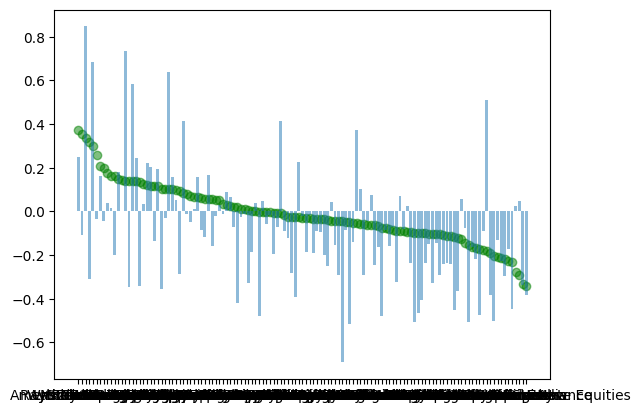

In [40]:
#정규화 이전
import matplotlib.pyplot as plt

plt.scatter(data_2022.index, data_2022['predict'], alpha=0.5, c='g')
plt.bar(data_2022.index, data_2022['price_YOY'], alpha=0.5 )
plt.show();

In [25]:
import numpy as np

predict_scale = []
predict_list = data_2022['predict']
for i in predict_list:
    tmp = ( i- np.median(predict_list) ) / np.std(predict_list)
    predict_scale.append(tmp)

predict_scale


[0.8937323363982044,
 0.03089609639528958,
 -0.5112609437912554,
 -0.11132754817805238,
 -0.1576223966739786,
 1.2468640306025298,
 -0.724093040461417,
 0.0,
 -1.3534045069916218,
 0.3483080900715381,
 0.16737579717596876,
 -0.5547095225646772,
 0.17014512236907386,
 -1.5081771024779074,
 -0.2595074095884272,
 -0.21939011531435404,
 0.6355002877803791,
 0.1780857733440132,
 1.0934418429927848,
 -0.07717919034588222,
 -0.5283150238498608,
 2.555185481324031,
 -0.34742407448075546,
 0.23471080396244923,
 -1.3407185531675874,
 -0.9279135254055262,
 0.07986529938474134,
 1.7538368401543312,
 0.2097755954250739,
 0.9601824288149904,
 -1.019408553670245,
 -0.2911675552952992,
 0.6942871674214466,
 -1.3010734998103046,
 0.6803617577129729,
 1.133294986019666,
 0.02100869040322732,
 -0.5406979676125945,
 -1.203902787933007,
 -0.1746035920676628,
 -0.05421268116614041,
 0.025811218357244134,
 0.2687202379218409,
 -2.3207533908519906,
 0.607876870011941,
 0.9326496911287949,
 -0.8524628866049877

In [26]:
import numpy as np

yoy_scale = []
predict_list = data_2022['price_YOY']
for i in predict_list:
    tmp = ( i- np.median(predict_list) ) / np.std(predict_list)
    yoy_scale.append(tmp)

yoy_scale

[-0.7319810213168949,
 -0.7224928701737967,
 -1.5528844787504987,
 -2.240094558773576,
 -1.5817505280911204,
 3.0658527214584375,
 0.5376818803137641,
 0.25780646638160926,
 -0.5124007142878965,
 0.07260146608643131,
 0.07086823949677766,
 -0.2116561557967843,
 -0.3913650006054759,
 -1.3251812136409615,
 -0.5818108299764424,
 -0.7442032327584289,
 -0.2611285494292946,
 0.2614083565626356,
 1.1616119175476451,
 -0.5927353278765002,
 -1.1688530352796784,
 -0.8236223236352408,
 -1.4559750824527267,
 -0.35899123344263545,
 -0.16352554430721025,
 -1.5503365562371199,
 0.004524593111342,
 0.927305487956381,
 0.4660403930959194,
 0.9205669745568131,
 -0.48705947381946424,
 -0.2791148181730911,
 0.915766068268556,
 -1.5388888935827543,
 0.020755161460382802,
 0.4637528979410042,
 1.166027799057109,
 -0.22540628005886107,
 -1.0942448985965498,
 1.7168179044510024,
 0.0,
 -1.1220395763302724,
 -0.894809310210333,
 -1.0950130639487827,
 0.25285021493765025,
 0.5304735206904038,
 0.056072207598034

In [18]:
import numpy as np

predict_scale = []
predict_list = data_2022['predict']
for i in predict_list:
    tmp = ( i- min(predict_list) ) / (max(predict_list)-min(predict_list))
    predict_scale.append(tmp)

predict_scale


[0.6093955192638194,
 0.4458208192554245,
 0.3430398150573929,
 0.4188583564883223,
 0.41008187538614976,
 0.6763414914714003,
 0.3026915487805131,
 0.4399636015529403,
 0.18338798968432402,
 0.5059951249202903,
 0.471694357103533,
 0.3348029238500537,
 0.4722193600144983,
 0.15404652290019324,
 0.39076672651992217,
 0.39837207973968014,
 0.560440424511342,
 0.47372473211279204,
 0.647256032204169,
 0.42533213115054297,
 0.33980673802588557,
 0.924370351287945,
 0.3740996680228746,
 0.48445958765889835,
 0.18579296642832333,
 0.2640516851139318,
 0.455104298920839,
 0.7724523423955212,
 0.47973242268013705,
 0.6219929895932635,
 0.24670624793038182,
 0.3847646619378804,
 0.5715851188993347,
 0.19330879319715769,
 0.5689451686863605,
 0.6548113081798186,
 0.44394638538949494,
 0.337459205299162,
 0.2117302146767161,
 0.4068626156778459,
 0.4296860741992304,
 0.44485683865158504,
 0.4909070254222265,
 0.0,
 0.5552036344170089,
 0.616773390440342,
 0.278355460309093,
 0.5726740893521762,


In [19]:
import numpy as np

yoy_scale = []
predict_list = data_2022['price_YOY']
for i in predict_list:
    tmp = ( i- min(predict_list) ) / (max(predict_list)-min(predict_list))
    yoy_scale.append(tmp)

yoy_scale

[0.2637396370897883,
 0.26539892962777184,
 0.12017963675028472,
 0.0,
 0.1151315278458647,
 0.9279066697232248,
 0.4857789097211807,
 0.4368341596957265,
 0.30213994916811937,
 0.4044454181640781,
 0.4041423106457141,
 0.3547343054570622,
 0.32330673429978724,
 0.16000049573244488,
 0.2900014740020325,
 0.2616022107422595,
 0.3460825489290984,
 0.43746406002192023,
 0.5948921014686611,
 0.288090992436826,
 0.18733924444326386,
 0.2477133610730396,
 0.13712719963289627,
 0.32896827462198075,
 0.3631514104640083,
 0.12062521869244056,
 0.39254010113938204,
 0.5539164778346355,
 0.4732502112047072,
 0.5527380432974561,
 0.30657163776354207,
 0.3429371014059045,
 0.5518984584447784,
 0.12262719156716212,
 0.39537851091412346,
 0.47285017292707243,
 0.5956643529986764,
 0.3523296769640806,
 0.2003867520771636,
 0.6919867974972587,
 0.3917488380709682,
 0.19552600516623675,
 0.23526414585248479,
 0.20025241494259716,
 0.43596740800582395,
 0.48451830824532377,
 0.4015547733108763,
 0.456380

In [27]:
df_compare = pd.DataFrame(predict_scale)
df_compare['price_YOY'] = yoy_scale
df_compare.sort_values(0, ascending=False, inplace=True)

In [28]:
df_compare

,0,price_YOY
105,2.954122,1.258428
100,2.831695,-0.072781
89,2.711541,3.478096
21,2.555185,-0.823622
51,2.422520,2.878043
...,...,...
13,-1.508177,-1.325181
91,-1.843859,0.426833
72,-1.935592,0.505408
110,-2.238279,-0.922285


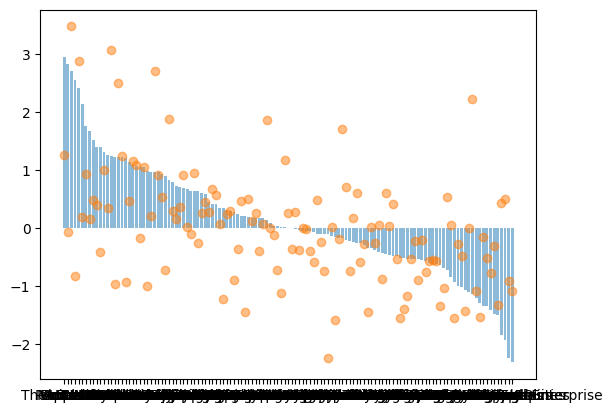

In [29]:
import matplotlib.pyplot as plt

plt.bar(data_2022.index, df_compare[0], alpha=0.5)
plt.scatter(data_2022.index, df_compare['price_YOY'], alpha=0.5)
plt.show();